# Navigation Project

---


### 1. Start the Environment

We begin by importing some necessary packages.

In [1]:
from unityagents import UnityEnvironment
from dqn_agent import *
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Info

Initialize the environment in the code cell below.

In [2]:
env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
state.shape

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


(37,)

### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.

In [4]:
import random
import torch
import numpy as np
from collections import deque

agent = Agent(state_size=37, action_size=4, seed=0)

In [5]:
def dqn(agentName,pth_name='checkpoint.pth',n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995,score_limit=13.0):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agentName.act(state, eps)                 # select an action
            action = action.astype(np.int32)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            agentName.step(state, action, reward, next_state, done)
            state = next_state                             # roll over the state to next time step
            score += reward                                # update the score
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=score_limit:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agentName.qnetwork_local.state_dict(), pth_name)
            break
    return scores



Episode 100	Average Score: 1.84
Episode 200	Average Score: 5.49
Episode 300	Average Score: 8.06
Episode 400	Average Score: 9.24
Episode 500	Average Score: 12.96
Episode 501	Average Score: 13.04
Environment solved in 401 episodes!	Average Score: 13.04


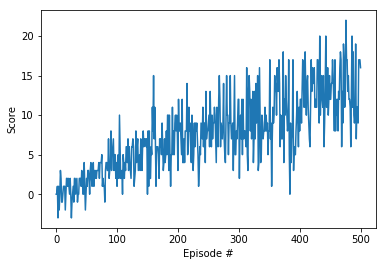

In [8]:
scores = dqn(agentName=agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 0.96
Episode 200	Average Score: 4.86
Episode 300	Average Score: 7.30
Episode 400	Average Score: 9.91
Episode 500	Average Score: 12.12
Episode 552	Average Score: 13.04
Environment solved in 452 episodes!	Average Score: 13.04


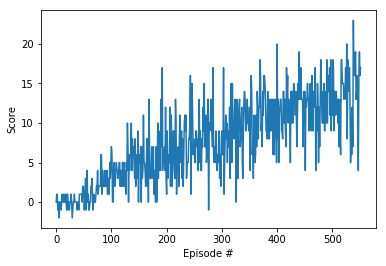

In [7]:
Duelingagent = DuelingAgent(state_size=37, action_size=4, seed=0)

scores = dqn(agentName=Duelingagent,pth_name='dueling.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


#### Elegelebility Trace with Deep Learning

In this part we implemented this paper https://arxiv.org/pdf/1810.09967.pdf which allows to use elegelebility traces with deep learning

In [5]:
def Edqn(agentName,pth_name='checkpoint.pth',n_episodes=500, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995,refresh=100):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        if i_episode % refresh ==0:
            agentName.refreshD(state)
        for t in range(max_t):
            action = agentName.act(state, eps)                 # select an action
            action = action.astype(np.int32)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            agentName.step(state, action, reward, next_state, done)
            state = next_state                             # roll over the state to next time step
            score += reward                                # update the score
            if done:
                agentName.refresh()
                agentName.memory.memory += agentName.L_memory.memory
                agentName.L_memory.memory.clear()
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agentName.qnetwork_local.state_dict(), pth_name)
            break
        if i_episode == n_episodes:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agentName.qnetwork_local.state_dict(), pth_name)
            break
            
    return scores

Episode 100	Average Score: 0.14
Episode 200	Average Score: -0.19
Episode 300	Average Score: 0.44
Episode 400	Average Score: 0.38
Episode 500	Average Score: 0.25

Environment solved in 400 episodes!	Average Score: 0.25


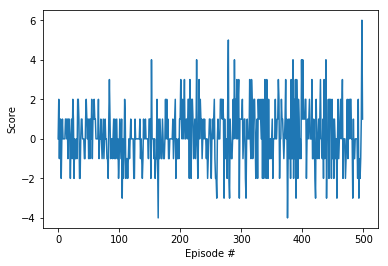

In [7]:
EtraceAgent = ETracesAgent(state_size=37, action_size=4, seed=0)

scores = Edqn(agentName=EtraceAgent,pth_name='trace.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

#### Longer trainning time

we train the dualing architecture longer

In [ ]:
Duelingagent = DuelingAgent(state_size=37, action_size=4, seed=0)

scores = dqn(agentName=Duelingagent,pth_name='dueling2.pth',score_limit=50)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [ ]:
agent.qnetwork_local.load_state_dict(torch.load('dueling.pth'))

for i in range(3):
    score = 0 
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    for j in range(200):
        action = agent.act(state)
        action = action.astype(np.int32)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state    
        if done:
            print("Score: {}".format(score))
            break 
            
env.close()